
Tabla de errores por iteración:
+-------------+------------------+------------------+--------------------+
|   Iteración |   Error Absoluto |   Error Relativo |   Error Cuadrático |
+=============+==================+==================+====================+
|           1 |     17.6313      |      1           |     1866.3         |
+-------------+------------------+------------------+--------------------+
|           2 |      7.39899     |      0.356882    |       90.7434      |
+-------------+------------------+------------------+--------------------+
|           3 |      1.40018     |      0.0632634   |        2.74645     |
+-------------+------------------+------------------+--------------------+
|           4 |      0.260702    |      0.011642    |        0.0785602   |
+-------------+------------------+------------------+--------------------+
|           5 |      0.0309175   |      0.00137876  |        0.0010739   |
+-------------+------------------+------------------+--------------

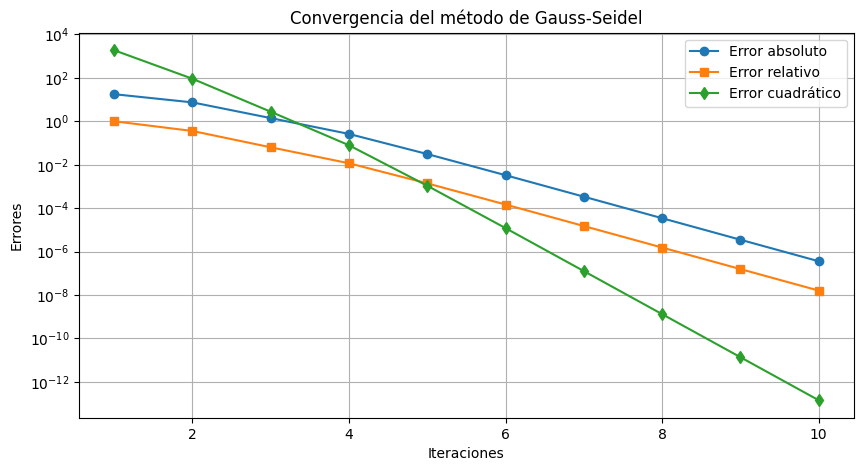


Solución aproximada: [22.42777655 20.19279709 15.43876857 20.10334591 15.3094809  13.19240016
 15.47018556 13.06228683 13.20018638 12.43579429]


In [4]:
#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Gauss-Seidel para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   Dr. Ivan de Jesus May-Cen
#   imaycen@hotmail.com
#   Version 1.0 : 28/02/2025
#

import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate  # Para mostrar la tabla de errores

def gauss_seidel(A, b, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    x_prev = np.copy(x)
    errors = []

    for k in range(max_iter):
        for i in range(n):
            sum1 = sum(A[i][j] * x[j] for j in range(i))
            sum2 = sum(A[i][j] * x_prev[j] for j in range(i + 1, n))
            x[i] = (b[i] - sum1 - sum2) / A[i][i]

        abs_error = np.linalg.norm(x - x_prev, ord=np.inf)
        rel_error = abs_error / (np.linalg.norm(x, ord=np.inf) + 1e-10)
        quad_error = np.linalg.norm(x - x_prev) ** 2

        errors.append([k + 1, abs_error, rel_error, quad_error])

        if abs_error < tol:
            break

        x_prev = np.copy(x)

    return x, errors

A = np.array([
    [15, -4,  -1, -2, 0, 0, 0, 0, 0, 0],
    [-3, 18, -2, 0, -1, 0, 0, 0, 0, 0],
    [-1, -2, 20, 0, 0, -5, 0, 0, 0, 0],
    [-2, -1, -4, 22, 0, 0, -1, 0, 0, 0],
    [0, -1, -3, -1, 25, 0, 0, -2, 0, 0],
    [0, 0, -2, 0, -1, 28, 0, 0, -1, 0],
    [0, 0, 0, -4, 0, -2, 30, 0, 0, -3],
    [0, 0, 0, 0, -1, 0, -1, 35, -2, 0],
    [0, 0, 0, 0, 0, -2, 0, -3, 40, -1],
    [0, 0, 0, 0, 0, 0, -3, 0, -1, 45]])

b = np.array([200, 250, 180, 300, 270, 310, 320, 400, 450, 500])

# Llamar a la función de Gauss-Seidel
x_sol, errors = gauss_seidel(A, b)

# Mostrar la tabla de errores en consola
print("\nTabla de errores por iteración:")
headers = ["Iteración", "Error Absoluto", "Error Relativo", "Error Cuadrático"]
print(tabulate(errors, headers=headers, tablefmt="grid"))

# Guardar errores en un archivo CSV
with open("errors.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(errors)
    writer.writerow([])
    writer.writerow(["Solución aproximada"])
    for val in x_sol:
        writer.writerow([val])

# Graficar errores
iterations = [e[0] for e in errors]
abs_errors = [e[1] for e in errors]
rel_errors = [e[2] for e in errors]
quad_errors = [e[3] for e in errors]

plt.figure(figsize=(10, 5))
plt.plot(iterations, abs_errors, label="Error absoluto", marker='o')
plt.plot(iterations, rel_errors, label="Error relativo", marker='s')
plt.plot(iterations, quad_errors, label="Error cuadrático", marker='d')
plt.yscale("log")
plt.xlabel("Iteraciones")
plt.ylabel("Errores")
plt.title("Convergencia del método de Gauss-Seidel")
plt.legend()
plt.grid()
plt.savefig("convergencia_gauss_seidel.png")
plt.show()

# Mostrar solución aproximada
print("\nSolución aproximada:", x_sol)


